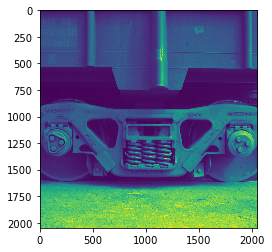

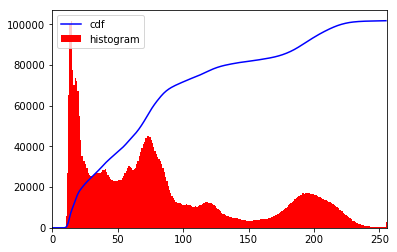

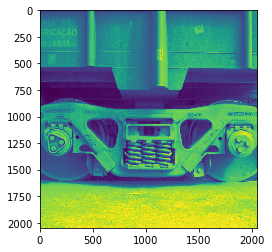

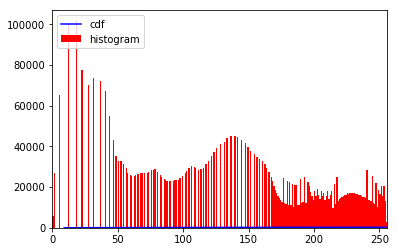

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('14-8_cam_2_image_3.tif',0)
 
hist,bins = np.histogram(img.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf *hist.max()/ cdf.max() # this line not necessary.
 
plt.imshow(img)
plt.show()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

plt.imshow(img2)
plt.show()

plt.plot(cdf_m, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


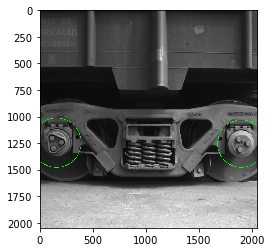

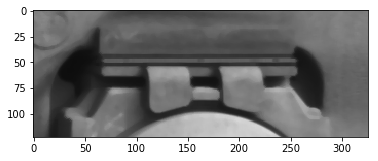

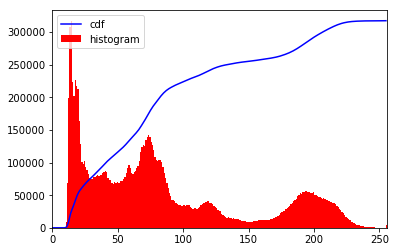

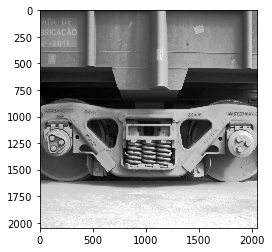

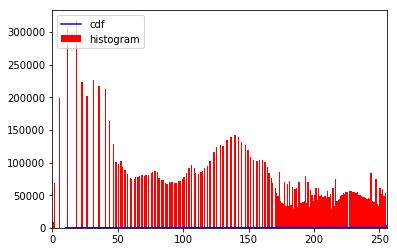

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('14-8_cam_2_image_3.tif',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
output = cimg.copy()

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT, 1.5, 1700)


circles = np.uint16(np.around(circles))
for (x, y, r) in circles[0,:]:
    # draw the outer circle
    cv2.circle(output,(x, y), int(1.82*r),(0,255,0),4)
    # draw the center of the circle
    cv2.circle(output,(x,y),2,(0,0,255),4)
plt.imshow(output)
plt.show()

crop_img = cimg[y-int(1.82*r):y-100, x-int(1.38*r):x+int(1.82*r)]

plt.imshow(crop_img)
plt.show()

hist,bins = np.histogram(cimg.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf *hist.max()/ cdf.max() 
plt.plot(cdf_normalized, color = 'b')
plt.hist(cimg.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[cimg]

plt.imshow(img2)
plt.show()

plt.plot(cdf_m, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


cv2.waitKey(0)
cv2.destroyAllWindows()